# Trees

In [15]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# tree visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# import from local file, not in sklearn yet
from tree_plotting import plot_tree

In [7]:
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names, filled=True)

In [8]:
print(tree_dot)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]", fillcolor="#399de567"] ;
1 [label="worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]", fillcolor="#399de5f4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.008\nsamples = 240\nvalue = [1, 239]", fillcolor="#399de5fe"] ;
1 -> 2 ;
3 [label="gini = 0.499\nsamples = 19\nvalue = [10, 9]", fillcolor="#e5813919"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]", fillcolor="#e58139de"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.497\nsamples = 37\nvalue = [20, 17]", fillcolor="#e5813926"] ;
4 -> 5 ;
6 [label="gini = 0.03\nsamples = 130\nvalue = [128, 2]", fillcolor="#e58139fb"] ;
4 -> 6 ;
}


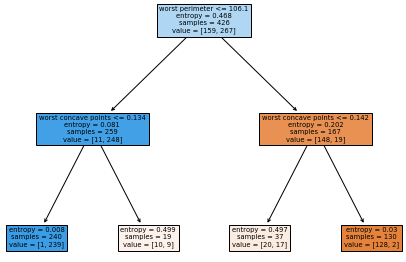

In [9]:
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

# Parameter Tuning

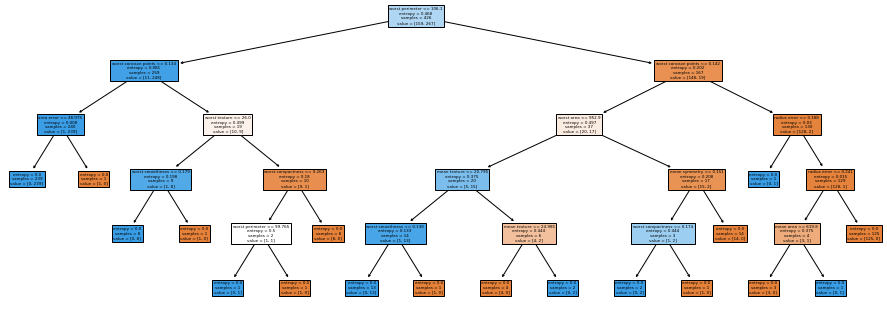

In [10]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

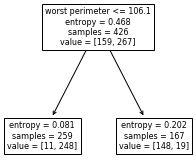

In [11]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
plt.figure(figsize=(2, 2))
plot_tree(tree, feature_names=cancer.feature_names)

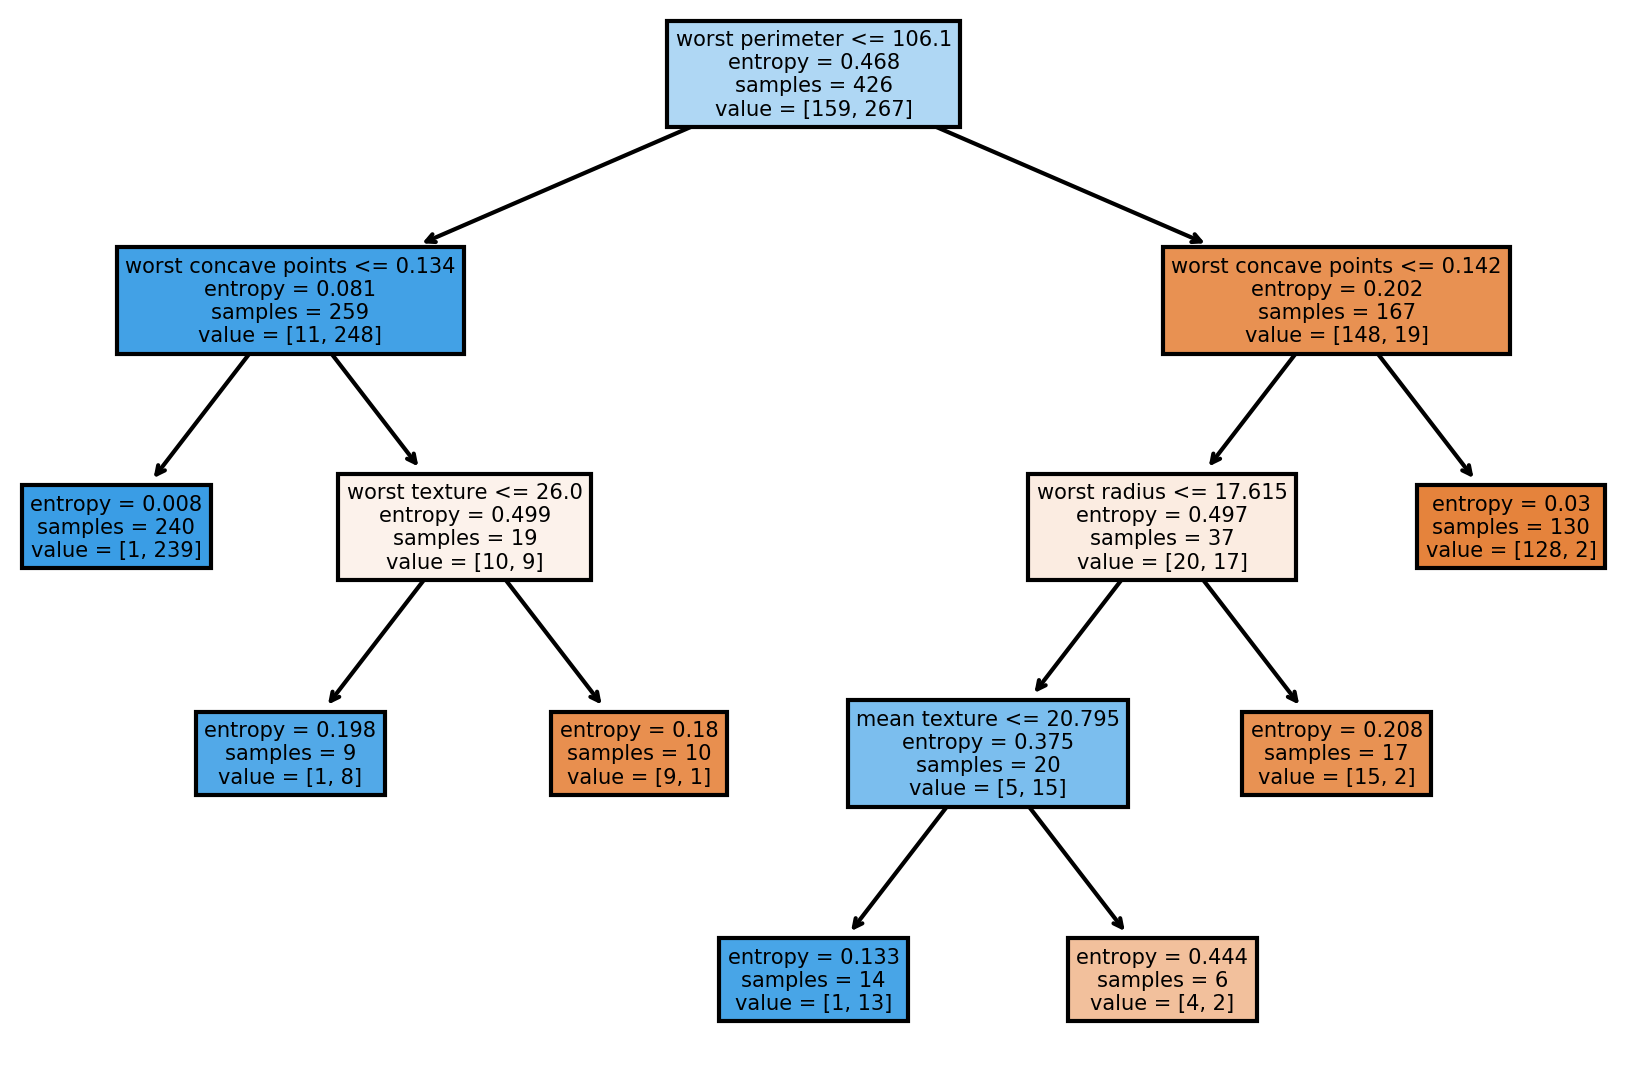

In [16]:
tree = DecisionTreeClassifier(max_leaf_nodes=7).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

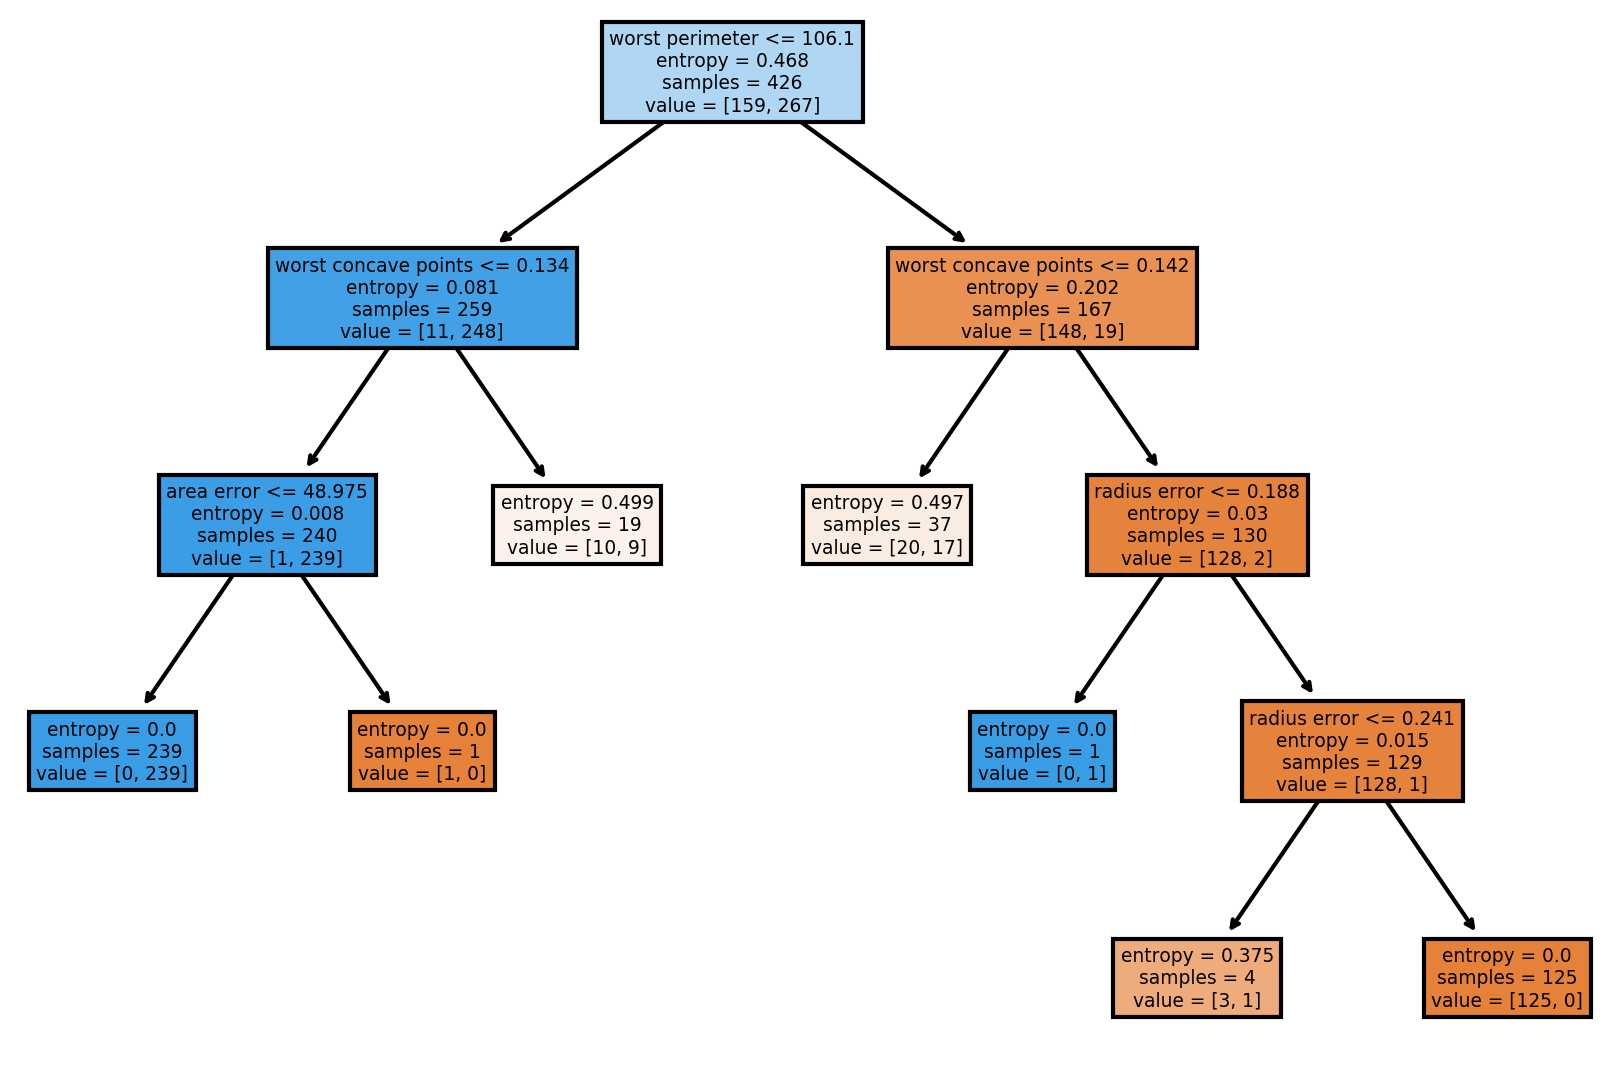

In [17]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=None, test_size='default',
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

/Users/skirmer/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


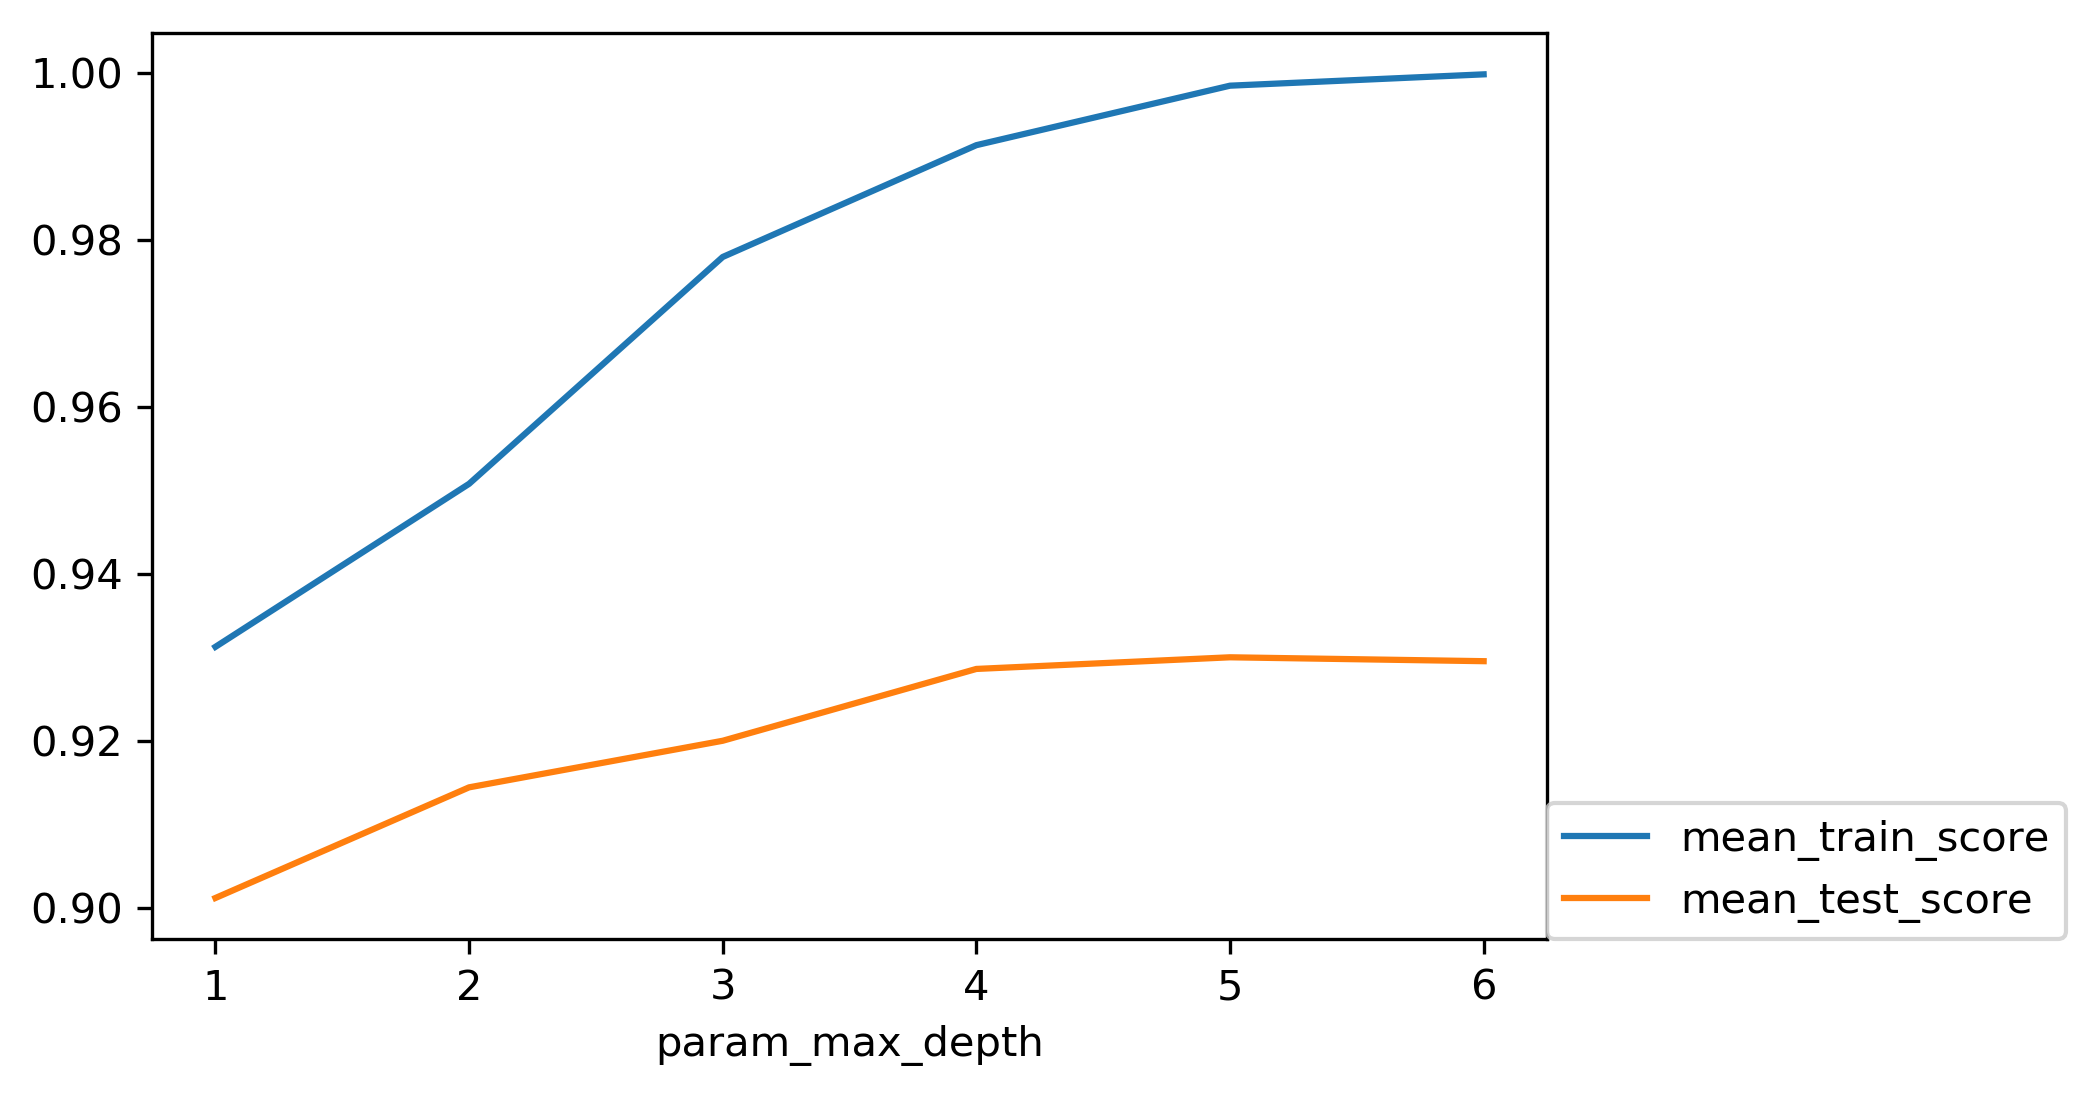

In [20]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

/Users/skirmer/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


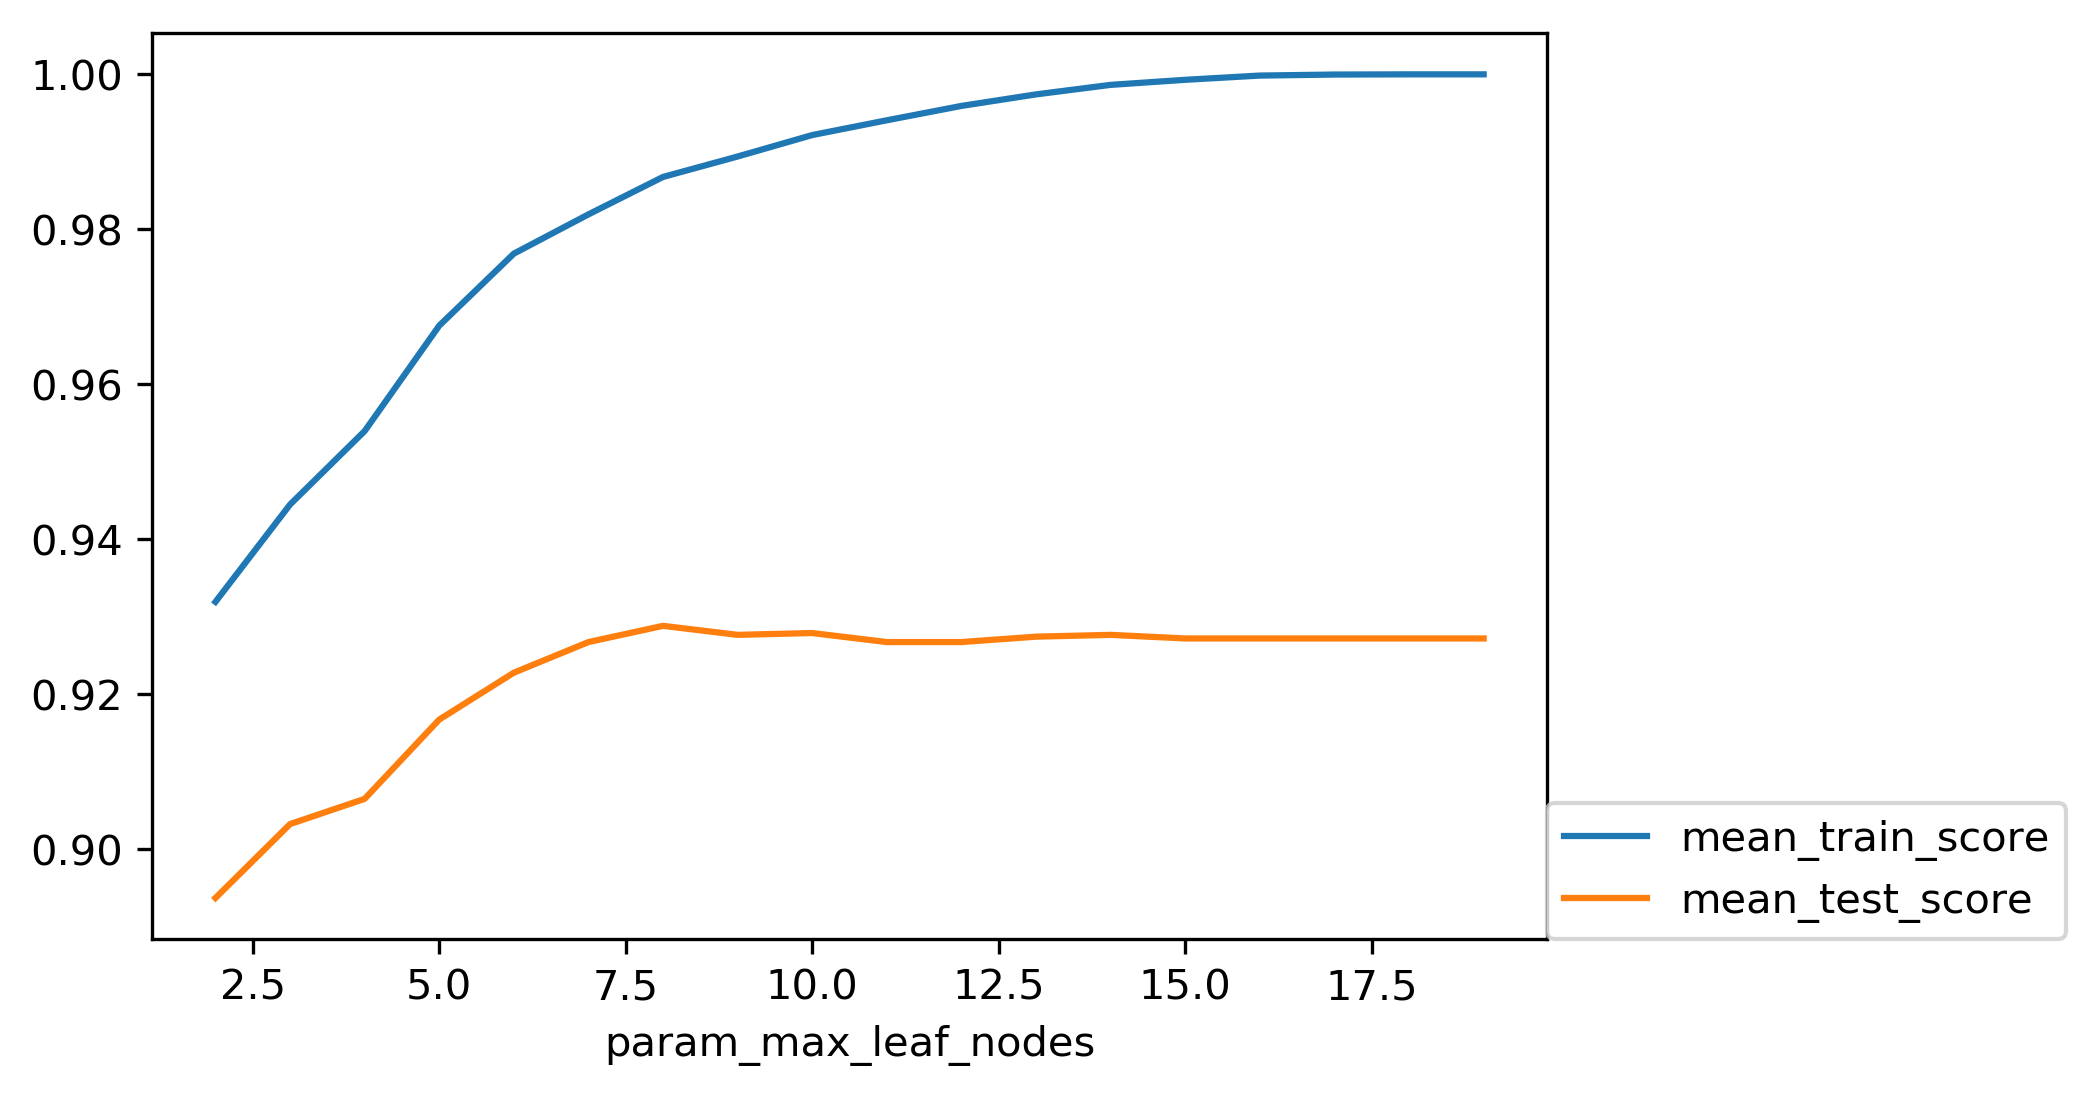

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100, random_state=1),
                   return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

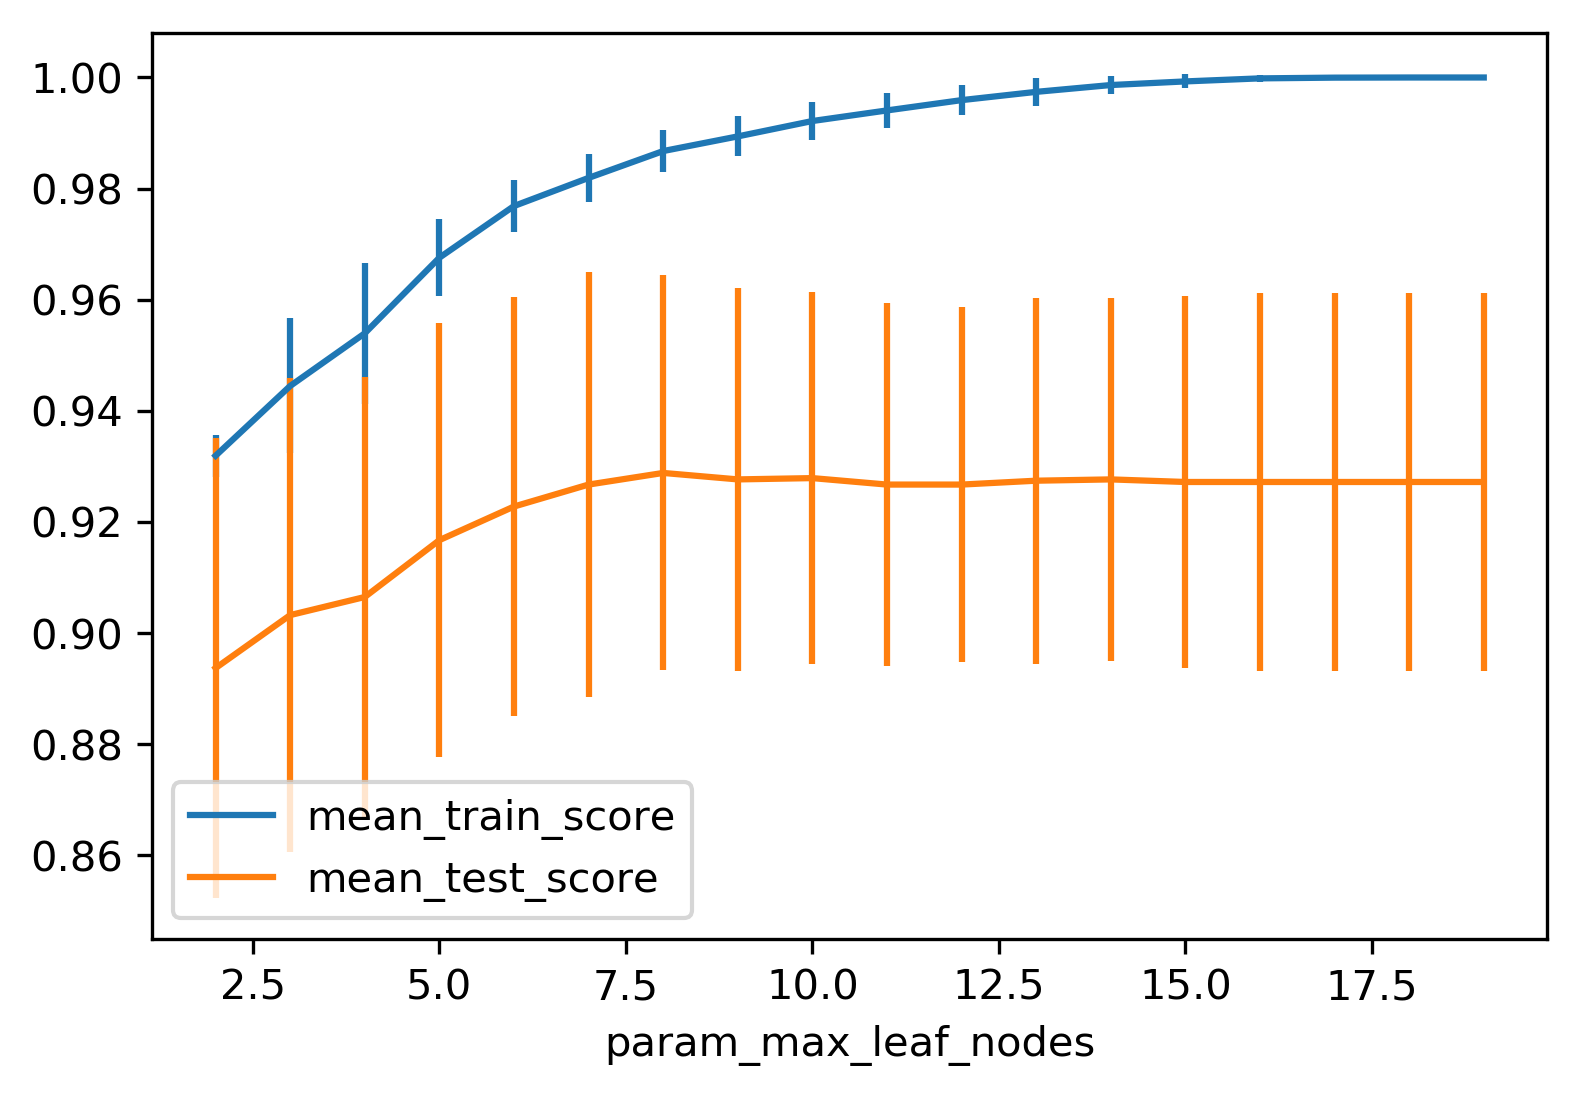

In [22]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [23]:
grid.best_params_

{'max_leaf_nodes': 8}

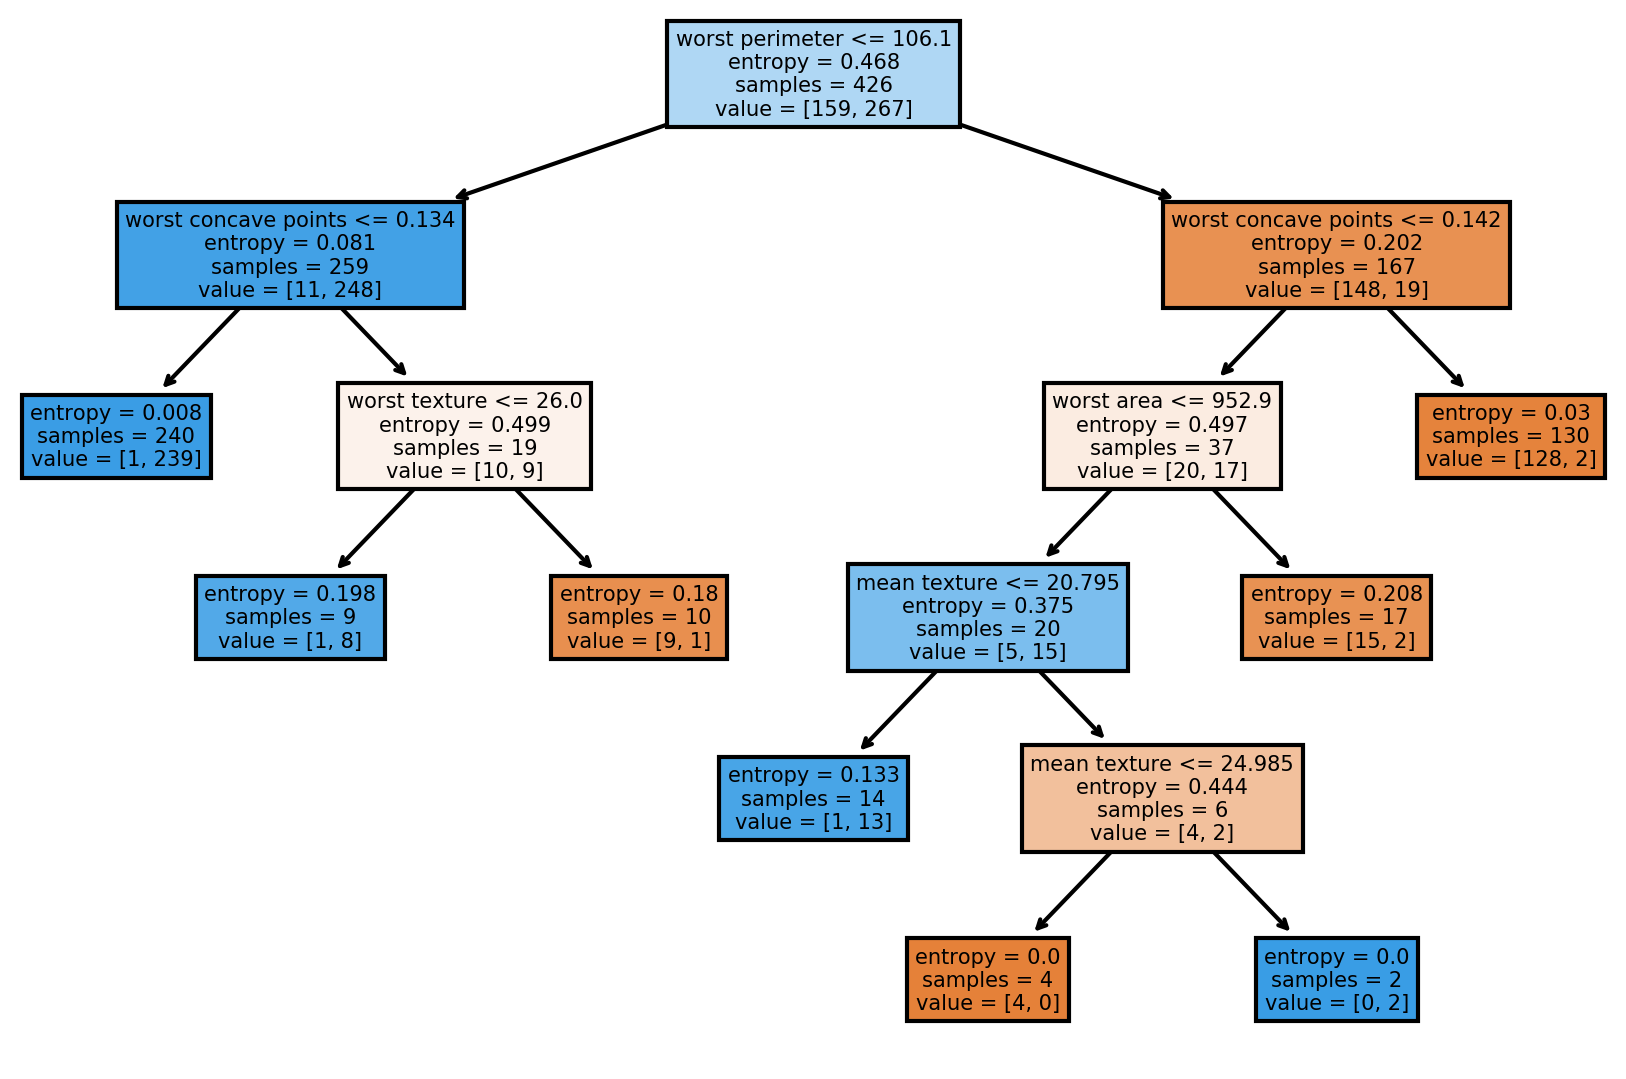

In [24]:
plot_tree(grid.best_estimator_, feature_names=cancer.feature_names, filled=True)

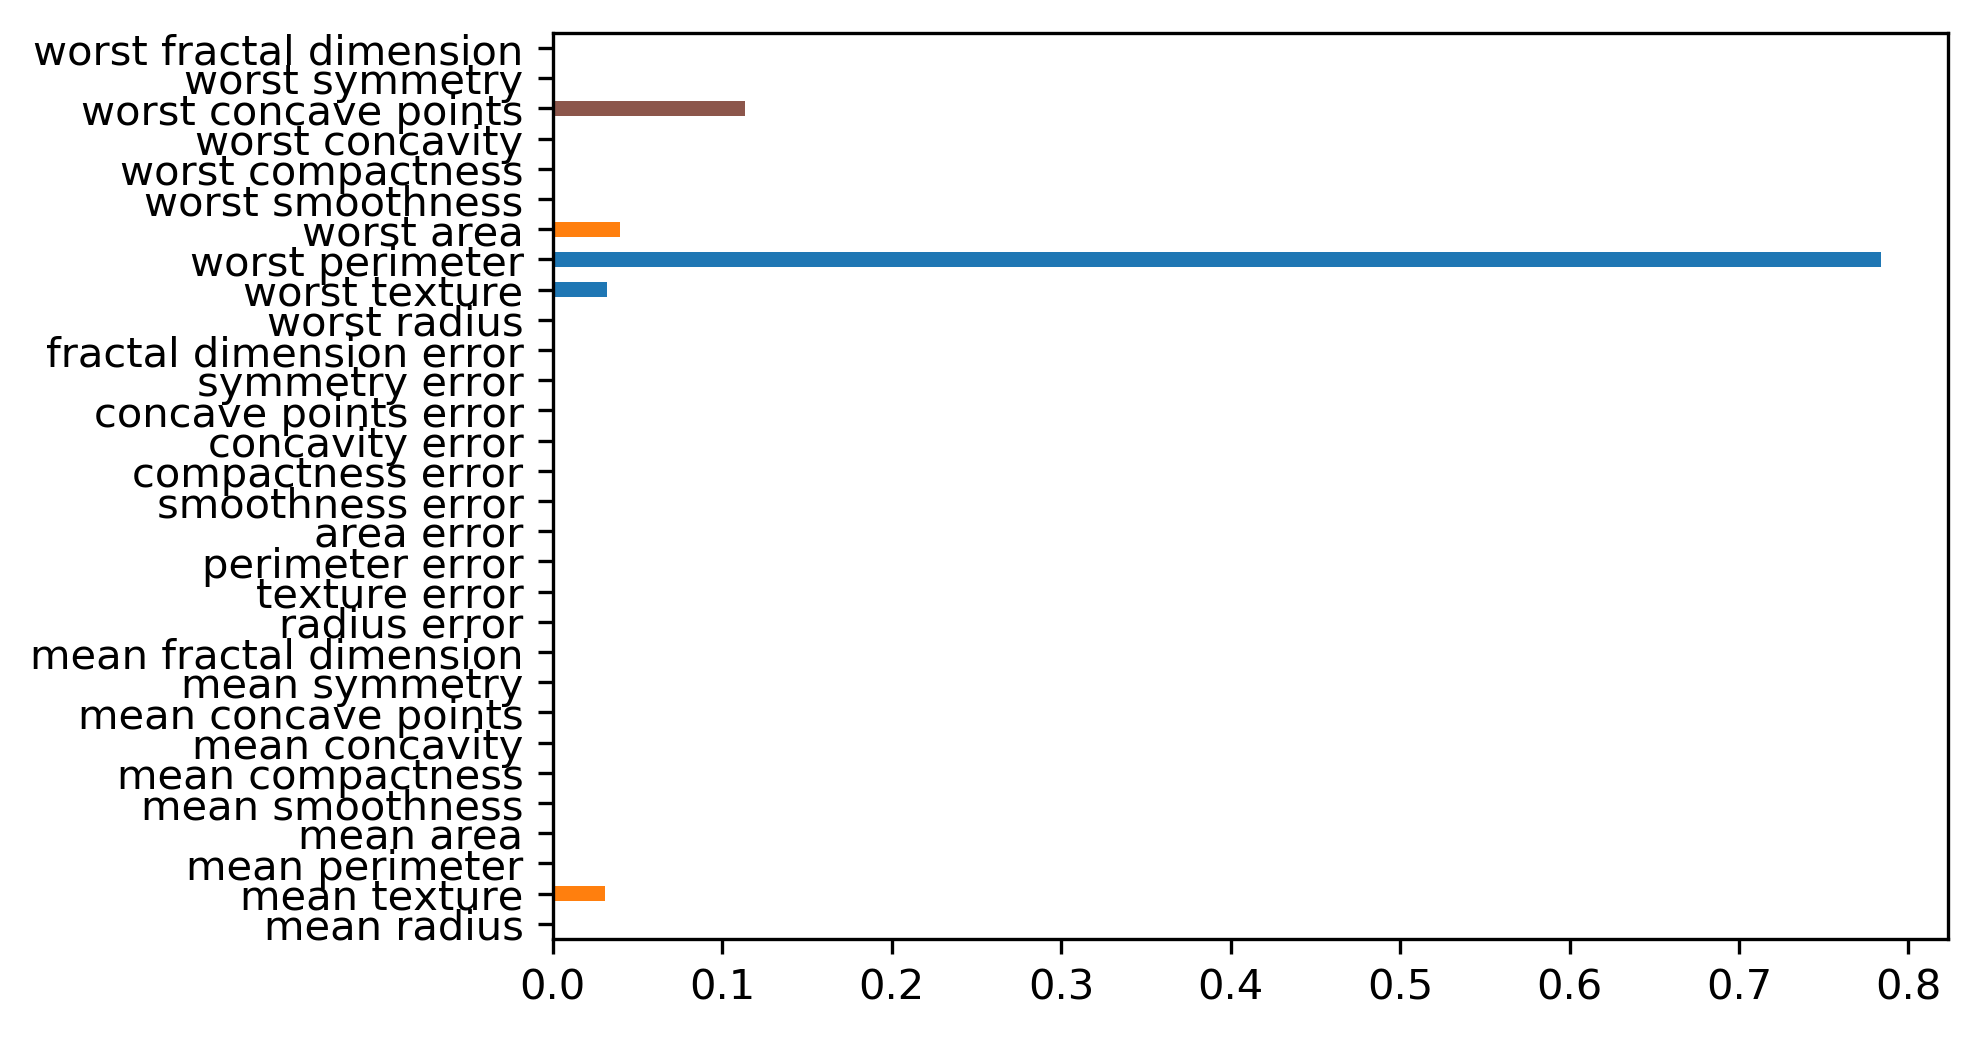

In [25]:
pd.Series(grid.best_estimator_.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")

# Extrapolation

Text(0,0.5,'Price in $/Mbyte')

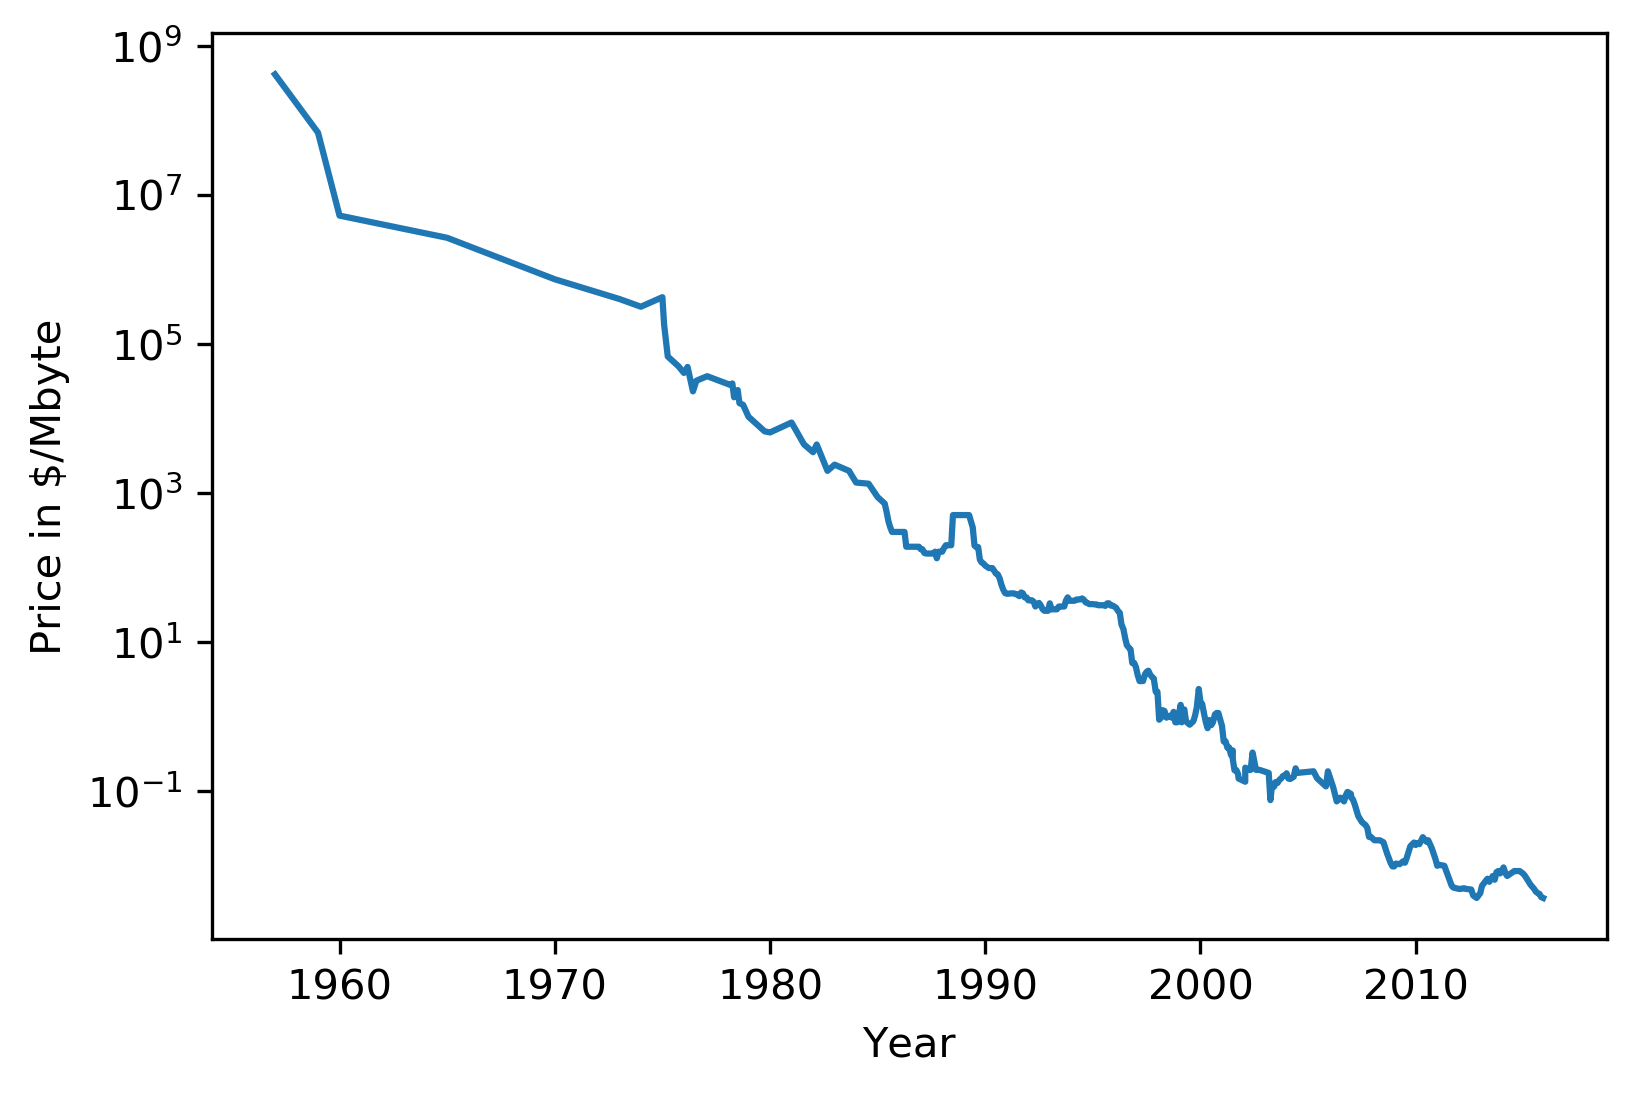

In [26]:
import os
ram_prices = pd.read_csv("data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(min_samples_split=5).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

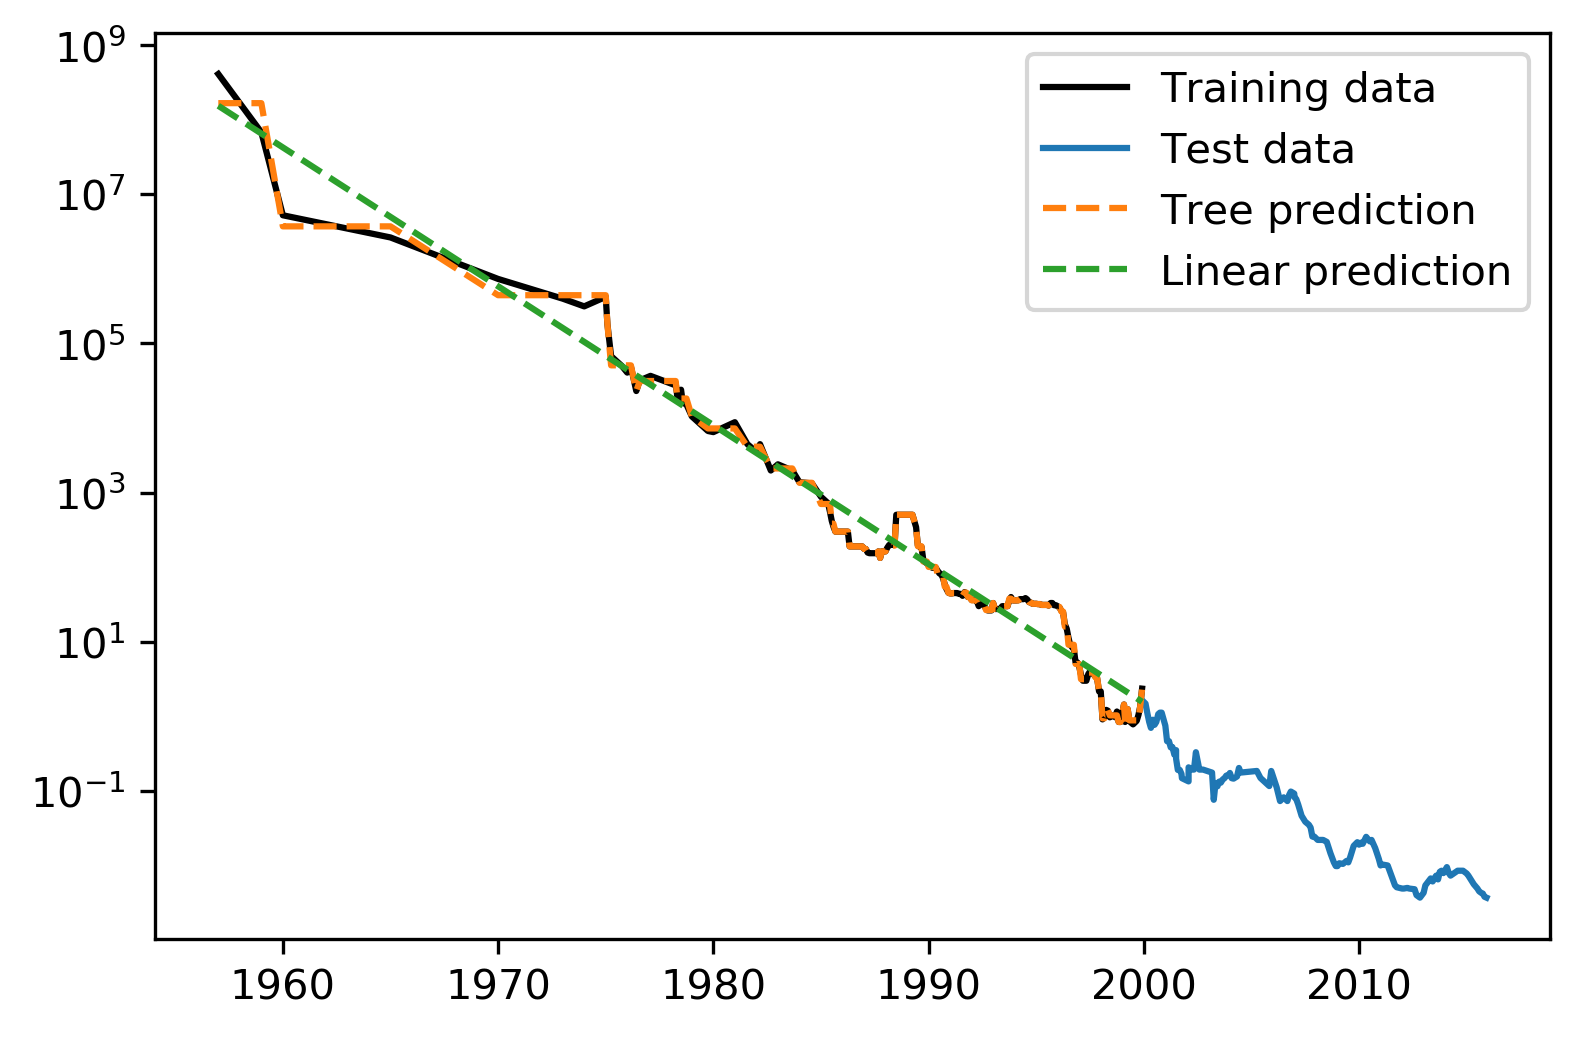

In [32]:
plt.semilogy(data_train.date, data_train.price, label="Training data", c='k')
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(data_train.date, np.exp(tree.predict(X_train)), '--', label="Tree prediction")
plt.semilogy(data_train.date, np.exp(linear_reg.predict(X_train)), '--', label="Linear prediction")
plt.legend()

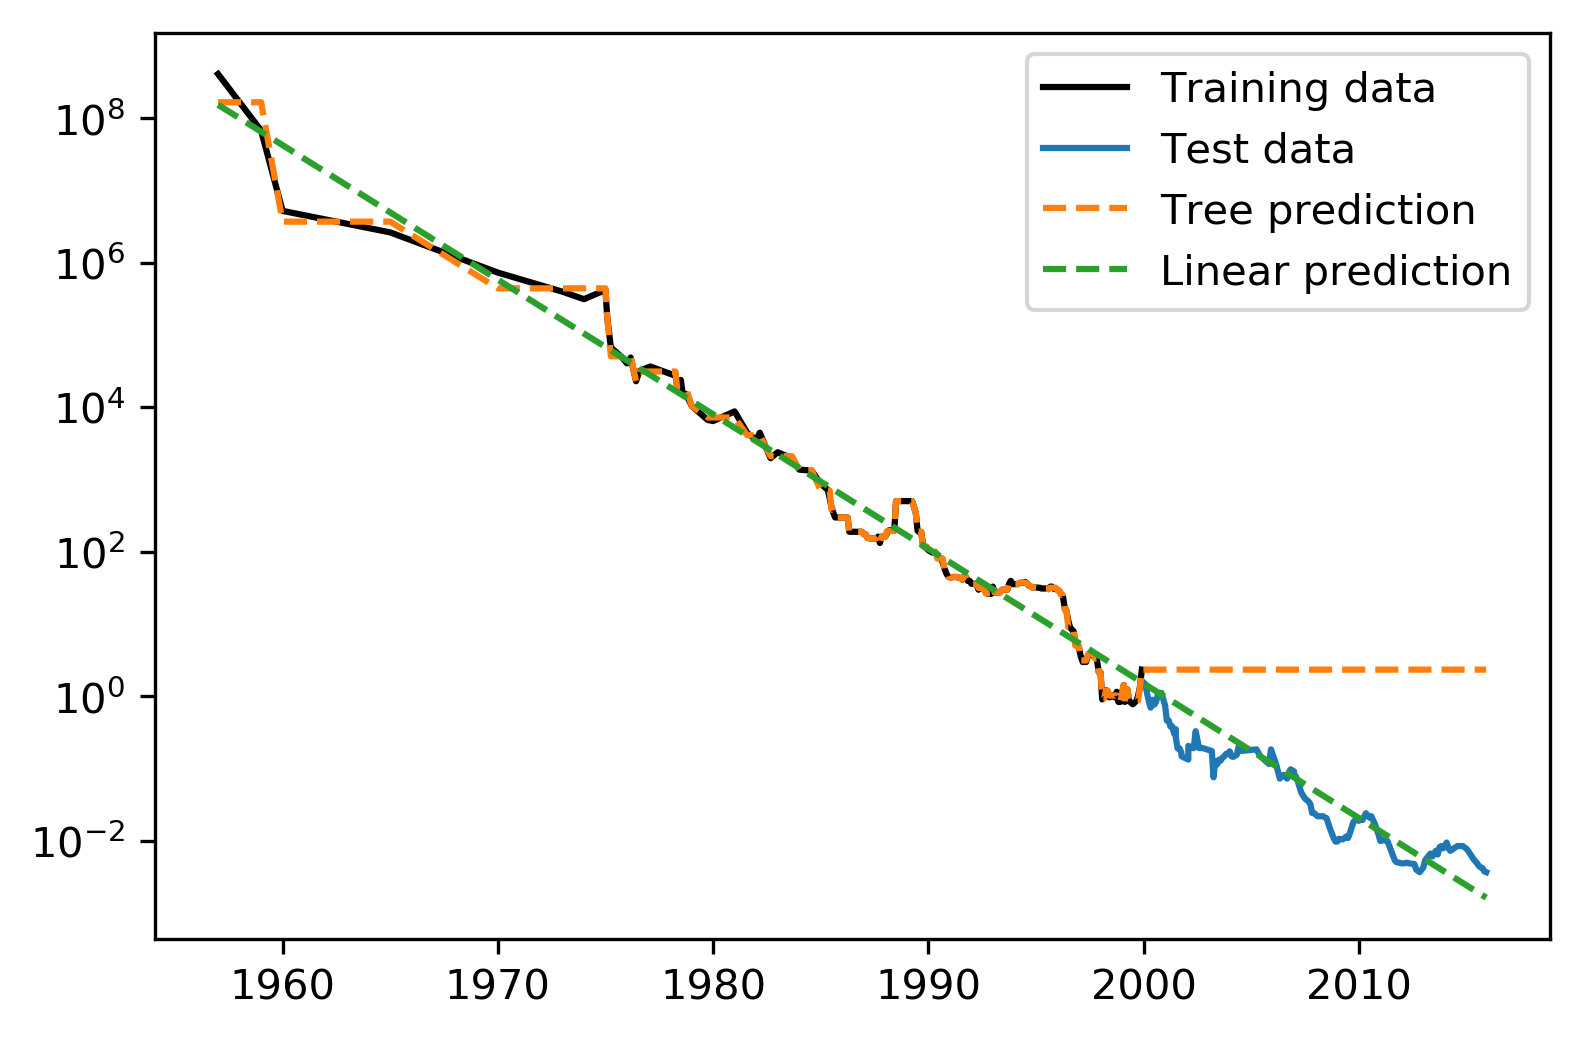

In [33]:
X_all = ram_prices.date[:, np.newaxis]
plt.semilogy(data_train.date, data_train.price, label="Training data", c='k')
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, np.exp(tree.predict(X_all)), '--', label="Tree prediction")
plt.semilogy(ram_prices.date, np.exp(linear_reg.predict(X_all)), '--', label="Linear prediction")
plt.legend()

# Exercise
Apply a decision tree to the "adult" dataset and visualize it.

Tune parameters with grid-search; use max_features, try at least max_leaf_nodes and max_depth, but separately.

Visualize the resulting tree and it's feature importances.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler


dbf = pd.read_csv("data/adult.csv", index_col=0)
dbf.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
# identify the dependent variable
income = dbf.income
data_features = dbf.drop("income", axis=1)

In [36]:
# one hot encoding
data_one_hot = pd.get_dummies(data_features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income
                                                    , stratify=income, random_state=0)

# Scale training data
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(X_train.shape)

print(y_train.value_counts())

(24420, 107)
 <=50K    18539
 >50K      5881
Name: income, dtype: int64


In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
from tree_plotting import plot_tree
tree_dot = export_graphviz(tree, out_file=None, feature_names=X_train.columns.values, filled=True)
print(tree_dot)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="marital-status_ Married-civ-spouse <= 0.5\ngini = 0.366\nsamples = 24420\nvalue = [18539, 5881]", fillcolor="#e58139ae"] ;
1 [label="capital-gain <= 7073.5\ngini = 0.121\nsamples = 13186\nvalue = [12332, 854]", fillcolor="#e58139ed"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.092\nsamples = 12948\nvalue = [12324, 624]", fillcolor="#e58139f2"] ;
1 -> 2 ;
3 [label="gini = 0.065\nsamples = 238\nvalue = [8, 230]", fillcolor="#399de5f6"] ;
1 -> 3 ;
4 [label="education-num <= 12.5\ngini = 0.494\nsamples = 11234\nvalue = [6207, 5027]", fillcolor="#e5813930"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.441\nsamples = 7840\nvalue = [5265, 2575]", fillcolor="#e5813982"] ;
4 -> 5 ;
6 [label="gini = 0.401\nsamples = 3394\nvalue = [942, 2452]", fillcolor="#399de59d"] ;
4 -> 6 ;
}


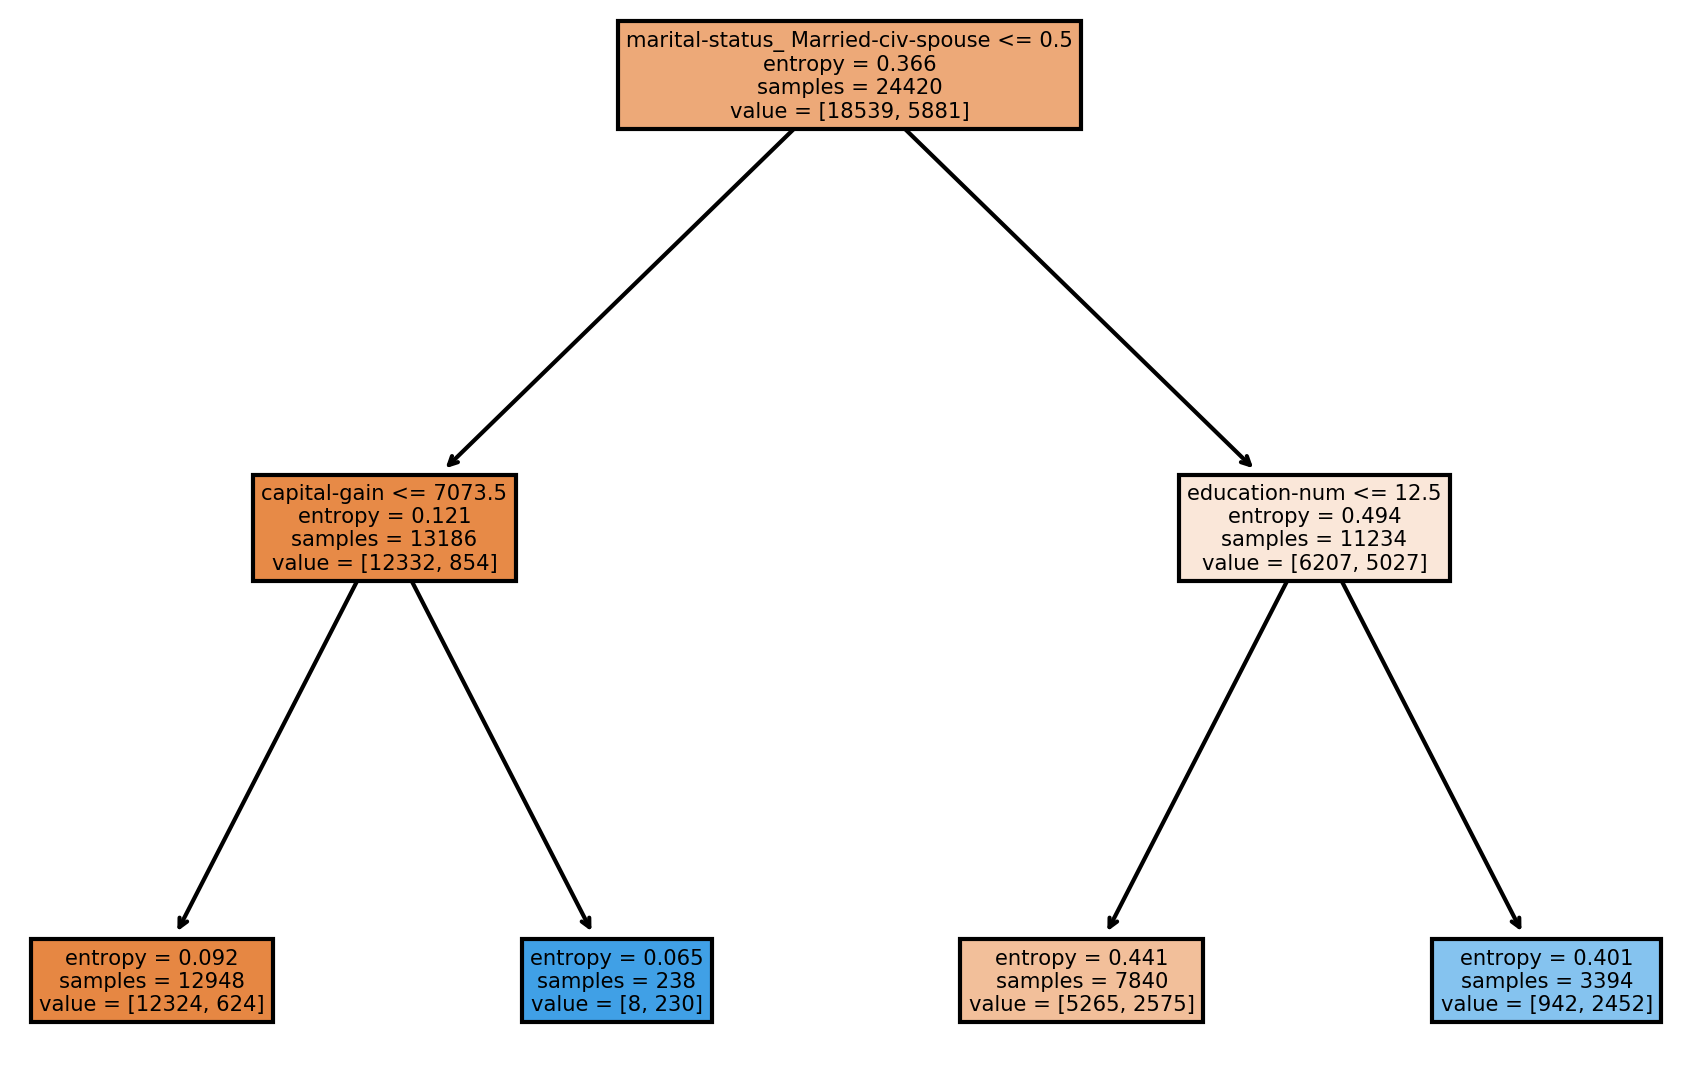

In [39]:
plot_tree(tree, feature_names=X_train.columns.values, filled=True)

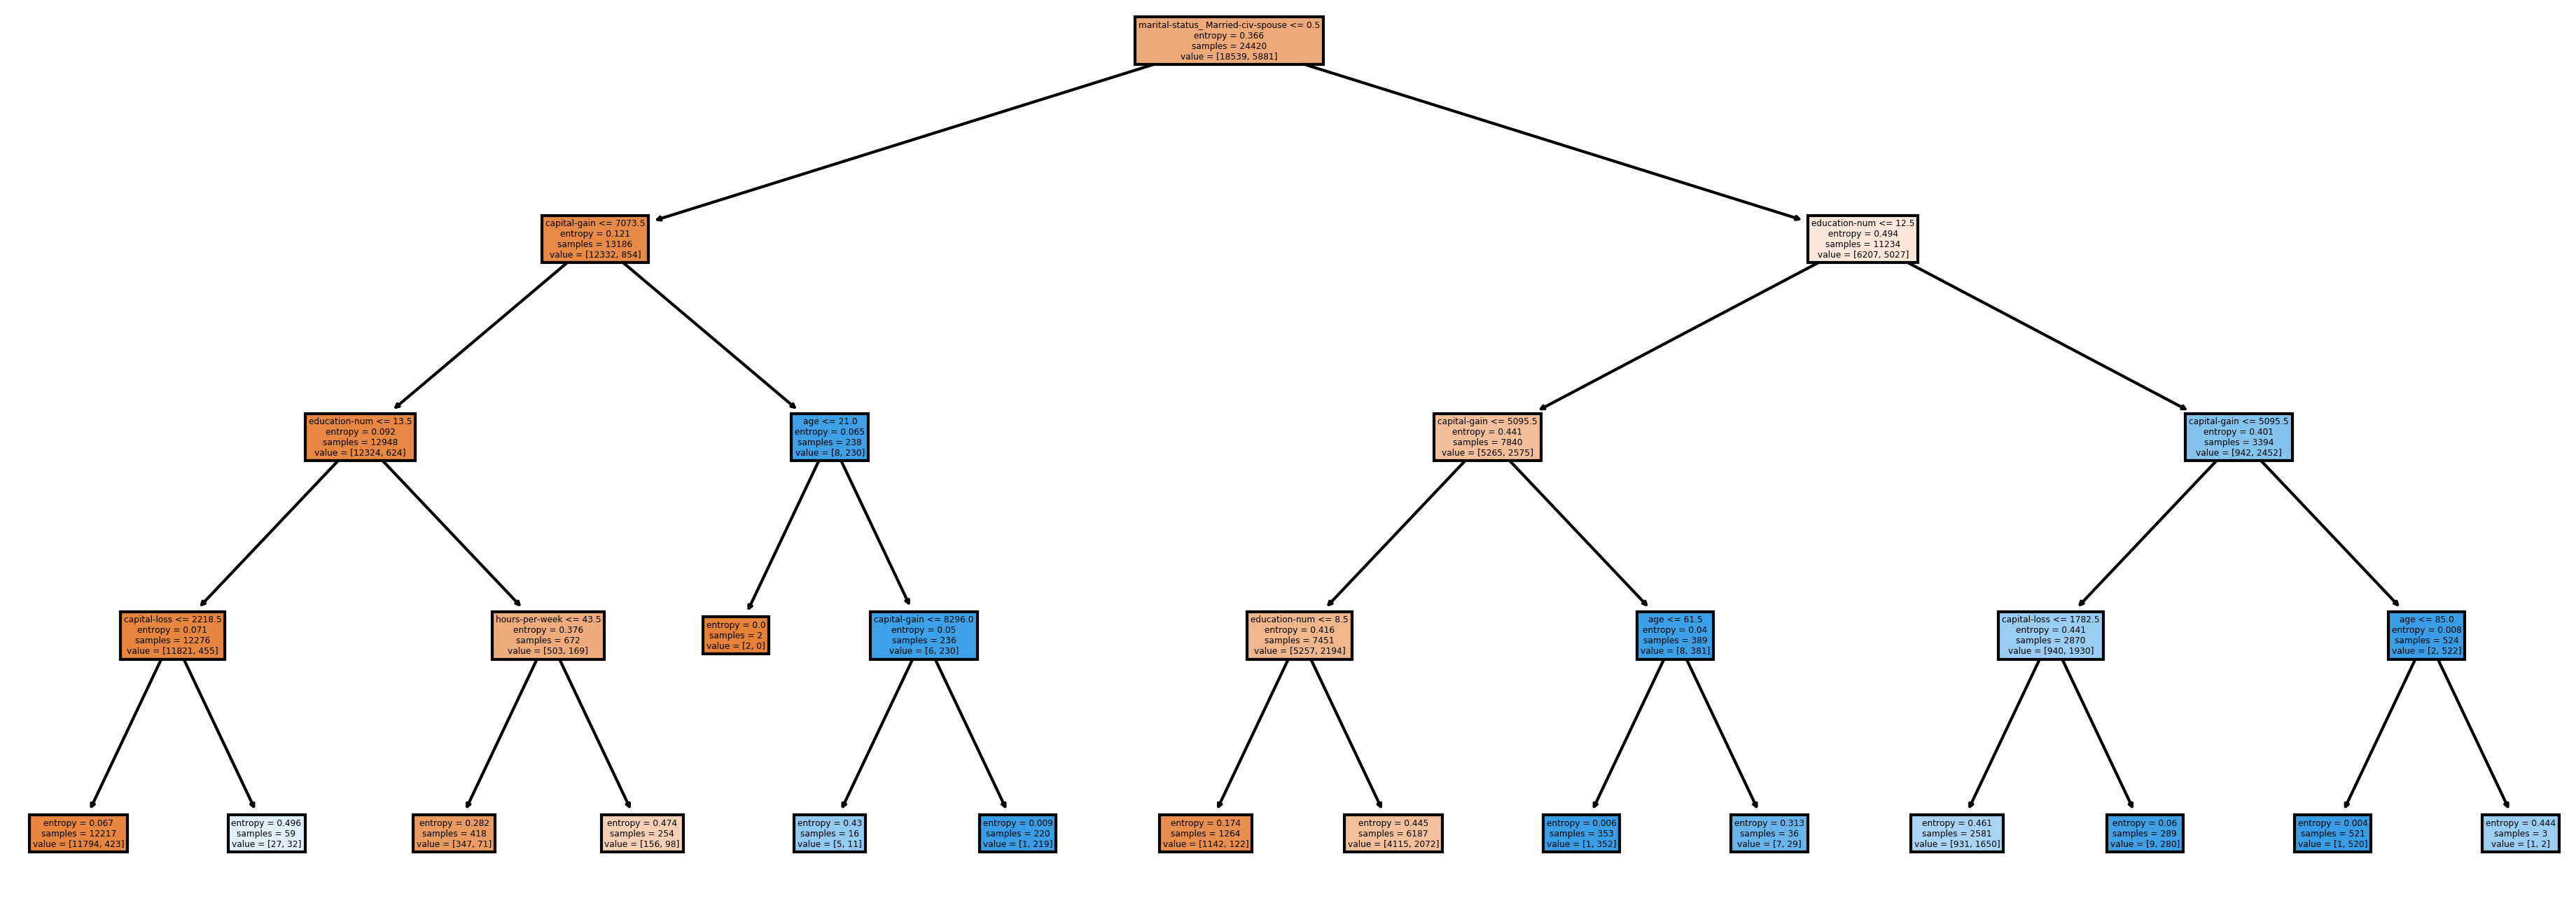

In [40]:
tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=X_train.columns.values, filled=True)

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 6)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

#plt.figure(figsize=(15, 5))


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': range(2, 6)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

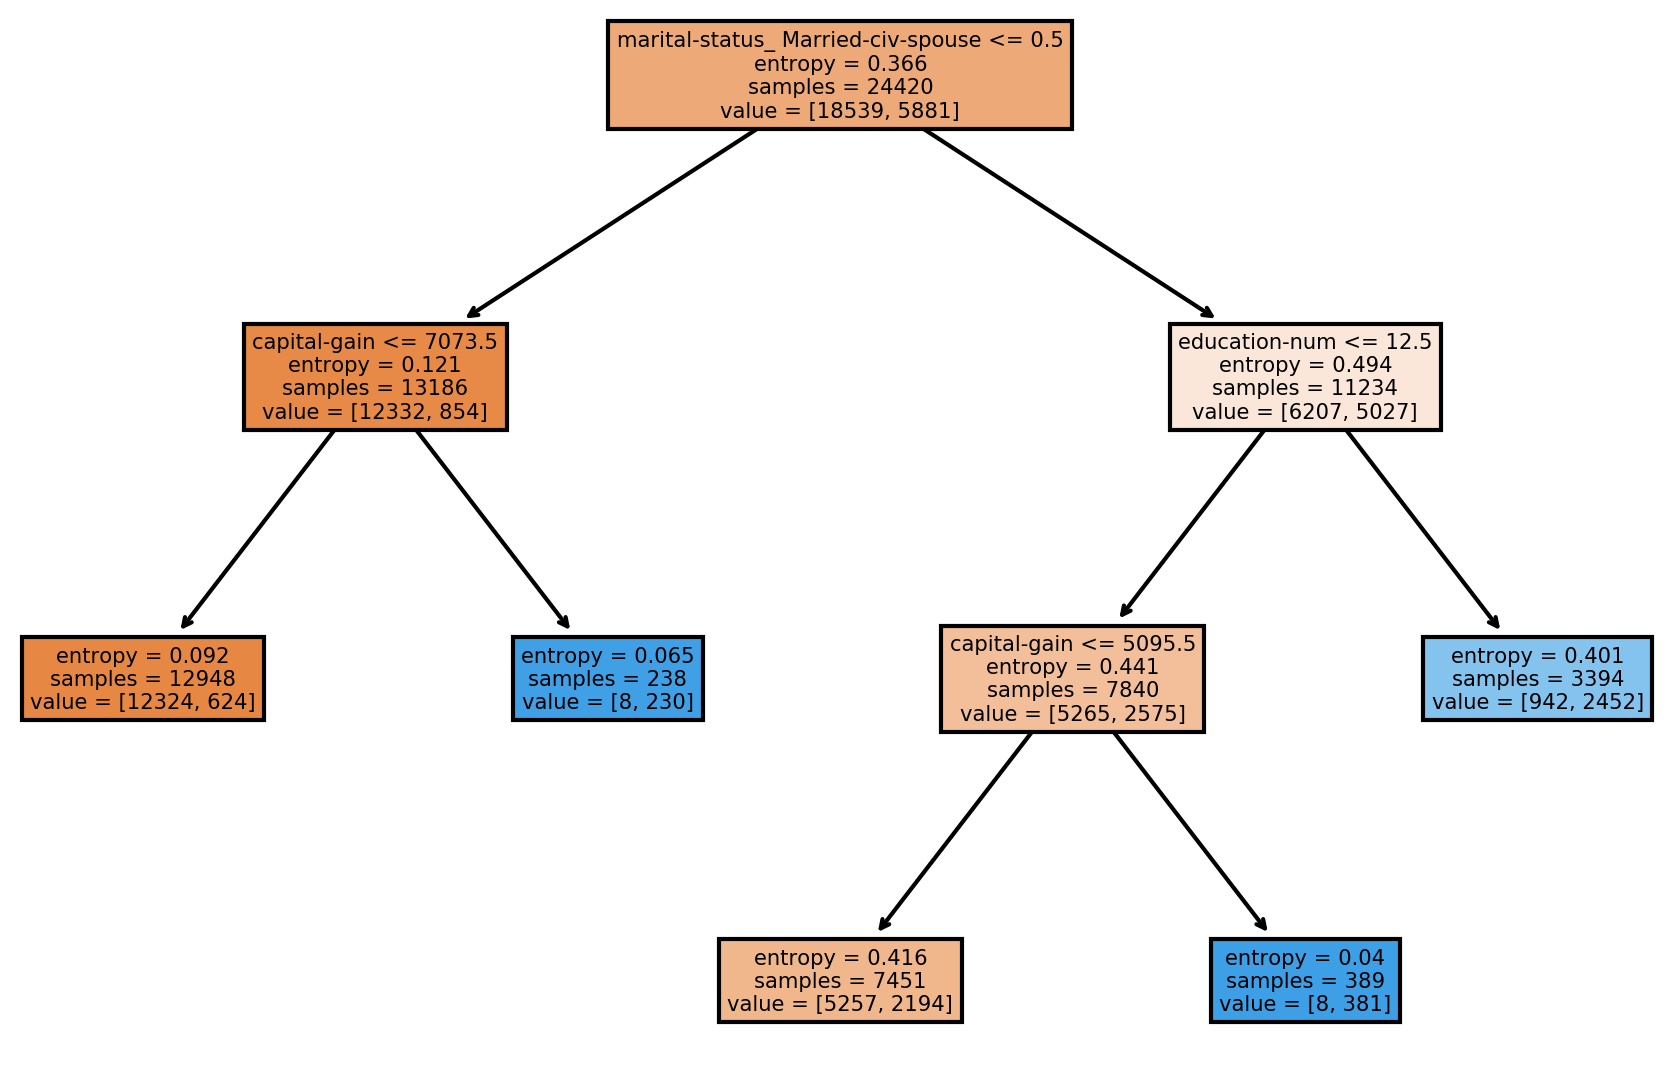

In [47]:
plot_tree(grid.best_estimator_, feature_names=X_train.columns.values, filled=True)